In [1]:
import pandas as pd
import pickle
import numpy as np
from google.colab import drive
from datetime import datetime, timedelta
drive.mount('/content/drive')
pickle_path = '/content/drive/MyDrive/trendyol_bootcamp_capstone/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def save_pickle(filename, data):
  outfile = open(pickle_path + filename,'wb')
  pickle.dump(data,outfile)
  outfile.close()

In [3]:
def load_pickle(filename):
  infile = open(pickle_path+filename,'rb')
  loaded_data = pickle.load(infile)
  infile.close()
  return loaded_data

In [4]:
'''
articles_path =  'https://storage.googleapis.com/gm-datascience-share/capstone/articles.csv.gz'
customers_path = 'https://storage.googleapis.com/gm-datascience-share/capstone/customers.csv.gz'
transactions_path = 'https://storage.googleapis.com/gm-datascience-share/capstone/transactions.csv.gz'

articles_df = pd.read_csv(articles_path)
customers_df = pd.read_csv(customers_path)
transactions_df = pd.read_csv(transactions_path)

save_pickle(pickle_path + 'articles.pickle',articles_df)
save_pickle(pickle_path + 'customers.pickle', customers_df)
save_pickle(pickle_path + 'transactions.pickle', transactions_df)
'''

"\narticles_path =  'https://storage.googleapis.com/gm-datascience-share/capstone/articles.csv.gz'\ncustomers_path = 'https://storage.googleapis.com/gm-datascience-share/capstone/customers.csv.gz'\ntransactions_path = 'https://storage.googleapis.com/gm-datascience-share/capstone/transactions.csv.gz'\n\narticles_df = pd.read_csv(articles_path)\ncustomers_df = pd.read_csv(customers_path)\ntransactions_df = pd.read_csv(transactions_path)\n\nsave_pickle(pickle_path + 'articles.pickle',articles_df)\nsave_pickle(pickle_path + 'customers.pickle', customers_df)\nsave_pickle(pickle_path + 'transactions.pickle', transactions_df)\n"

In [67]:
articles_df = load_pickle('articles.pickle')
customers_df = load_pickle('customers.pickle')
transactions_df = load_pickle('transactions.pickle')

In [6]:
#hiç satın alınmamış ürünler ve satın almamış customerlarla ilgilenmiyoruz
#cold start problemi, onlar için farklı modeller kullanılmalı
customers_in_transactions = set(list(transactions_df['customer_id']))
customers_df = customers_df[customers_df['customer_id'].isin(customers_in_transactions)]

articles_in_transactions = set(list(transactions_df['article_id']))
articles_df = articles_df[articles_df['article_id'].isin(articles_in_transactions)]


In [7]:
def text_to_categorical(df,column_name):
  one_hot_encoded_df = pd.get_dummies(df[column_name])
  df =pd.concat([df, one_hot_encoded_df], axis=1)
  df.drop(columns=[column_name], inplace = True)
  return df


In [8]:
from sklearn.preprocessing import StandardScaler
def standardize_column(df, column_name):
  x = customers_df.loc[:, [column_name]].values
  df[column_name] = StandardScaler().fit_transform(x)
  return df

In [9]:
from sklearn.decomposition import PCA
def get_principle_components(df,n):
  pca = PCA(n_components=n)
  principal_components = pca.fit_transform(df)
  return principal_components


# **TRANSACTIONS**

In [10]:
'''
transactions_df['t_dat'] =  pd.to_datetime(transactions_df['t_dat'], format='%Y-%m-%d')
#train test split
transaction_count = len(transactions_df['t_dat'])
validation_data_start_date = transactions_df['t_dat'][transaction_count-1] - timedelta(days=14)
test_data_start_date = transactions_df['t_dat'][transaction_count-1] - timedelta(days=6)
between_13_7_condition = np.logical_and(transactions_df['t_dat']<test_data_start_date,transactions_df['t_dat']>validation_data_start_date)
validation_data = transactions_df[between_13_7_condition]
test_data = transactions_df[transactions_df['t_dat'] >= test_data_start_date]
train_data = transactions_df[transactions_df['t_dat'] <= validation_data_start_date]
save_pickle('test_data.pickle', test_data)
save_pickle('train_data.pickle', train_data)
save_pickle('validation_data.pickle', validation_data)
'''

"\ntransactions_df['t_dat'] =  pd.to_datetime(transactions_df['t_dat'], format='%Y-%m-%d')\n#train test split\ntransaction_count = len(transactions_df['t_dat'])\nvalidation_data_start_date = transactions_df['t_dat'][transaction_count-1] - timedelta(days=14)\ntest_data_start_date = transactions_df['t_dat'][transaction_count-1] - timedelta(days=6)\nbetween_13_7_condition = np.logical_and(transactions_df['t_dat']<test_data_start_date,transactions_df['t_dat']>validation_data_start_date)\nvalidation_data = transactions_df[between_13_7_condition]\ntest_data = transactions_df[transactions_df['t_dat'] >= test_data_start_date]\ntrain_data = transactions_df[transactions_df['t_dat'] <= validation_data_start_date]\nsave_pickle('test_data.pickle', test_data)\nsave_pickle('train_data.pickle', train_data)\nsave_pickle('validation_data.pickle', validation_data)\n"

In [11]:
test_data = load_pickle('test_data.pickle')
train_data = load_pickle('train_data.pickle')
validation_data = load_pickle('validation_data.pickle')

test_data.reset_index(drop=True,inplace=True)
validation_data.reset_index(drop=True,inplace=True)

In [12]:
set(test_data['t_dat'])

{Timestamp('2020-09-16 00:00:00'),
 Timestamp('2020-09-17 00:00:00'),
 Timestamp('2020-09-18 00:00:00'),
 Timestamp('2020-09-19 00:00:00'),
 Timestamp('2020-09-20 00:00:00'),
 Timestamp('2020-09-21 00:00:00'),
 Timestamp('2020-09-22 00:00:00')}

In [13]:
set(validation_data['t_dat'])

{Timestamp('2020-09-09 00:00:00'),
 Timestamp('2020-09-10 00:00:00'),
 Timestamp('2020-09-11 00:00:00'),
 Timestamp('2020-09-12 00:00:00'),
 Timestamp('2020-09-13 00:00:00'),
 Timestamp('2020-09-14 00:00:00'),
 Timestamp('2020-09-15 00:00:00')}

In [45]:
first_date = train_data['t_dat'][0]
type(first_date)

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
season1_start = train_data['t_dat'][0]
season2_start = train_data['t_dat'][0] + timedelta(days=180)

In [58]:
season_2_df = train_data[train_data['t_dat']>=season2_start]
season_2_df

,t_dat,customer_id,article_id,price,sales_channel_id
7541624,2019-03-19,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,542533001,0.033881,2
7541625,2019-03-19,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,464277014,0.022017,2
7541626,2019-03-19,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,542533002,0.033881,2
7541627,2019-03-19,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,573626001,0.033881,2
7541628,2019-03-19,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,573626001,0.033881,2
...,...,...,...,...,...
31292767,2020-09-08,fff2282977442e327b45d8c89afde25617d00124d0f999...,919786002,0.042356,2
31292768,2020-09-08,fffbdd2f8e59d45c0fb50a14b0ea555f7daa5307b3f922...,765308002,0.033881,2
31292769,2020-09-08,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,689365050,0.010017,2
31292770,2020-09-08,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,884081001,0.012898,2


In [49]:
season_1_condition = np.logical_and(train_data['t_dat']<season2_start , train_data['t_dat']>=season1_start)
season_1_df = train_data[season_1_condition]
season_1_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [85]:
most_purchased_items_season1 = season_1_df.groupby('article_id').size().sort_values(ascending=False)[:10].to_frame(name='count')
most_purchased_items_season1 = most_purchased_items_season1.reset_index()
most_purchased_items_season1

,article_id,count
0,399223001,10111
1,565379001,10011
2,539723005,9893
3,706016001,8997
4,689109001,8985
5,539723001,8419
6,108775015,8397
7,562245001,8145
8,372860001,7844
9,507910001,7802


In [80]:
most_purchased_items_season2 = season_2_df.groupby('article_id').size().sort_values(ascending=False)[:10].to_frame(name='count')
most_purchased_items_season2 = most_purchased_items_season2.reset_index()
most_purchased_items_season2

,article_id,count
0,706016001,40508
1,706016002,27068
2,759871002,26118
3,372860001,23374
4,610776002,22636
5,372860002,21005
6,720125001,20949
7,464297007,19373
8,610776001,17515
9,751471001,17130


In [97]:
articles_df[articles_df['article_id']==most_purchased_items_season1['article_id'][i]]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
2236,399223001,399223,Curvy Jeggings HW Ankle,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Denim Trousers,D,Divided,2,Divided,57,Ladies Denim,1016,Trousers Denim,"Jeggings in washed, superstretch denim with a ..."


In [103]:
len(most_purchased_items_season1)

10

In [105]:
for i in range(len(most_purchased_items_season1)):
  print(articles_df[articles_df['article_id']==most_purchased_items_season1['article_id'][i]]['product_type_name'])

2236    Trousers
Name: product_type_name, dtype: object
15137    Vest top
Name: product_type_name, dtype: object
10289    Trousers
Name: product_type_name, dtype: object
53892    Trousers
Name: product_type_name, dtype: object
47592    Bikini top
Name: product_type_name, dtype: object
10285    Trousers
Name: product_type_name, dtype: object
0    Vest top
Name: product_type_name, dtype: object
14240    Trousers
Name: product_type_name, dtype: object
1713    Socks
Name: product_type_name, dtype: object
6658    Shirt
Name: product_type_name, dtype: object


In [106]:
for i in range(len(most_purchased_items_season2)):
  print(articles_df[articles_df['article_id']==most_purchased_items_season2['article_id'][i]]['product_type_name'])

53892    Trousers
Name: product_type_name, dtype: object
53893    Trousers
Name: product_type_name, dtype: object
70221    Vest top
Name: product_type_name, dtype: object
1713    Socks
Name: product_type_name, dtype: object
24837    T-shirt
Name: product_type_name, dtype: object
1714    Socks
Name: product_type_name, dtype: object
58491    Leggings/Tights
Name: product_type_name, dtype: object
3711    Underwear bottom
Name: product_type_name, dtype: object
24836    T-shirt
Name: product_type_name, dtype: object
67522    Trousers
Name: product_type_name, dtype: object


# **CUSTOMERS**

In [14]:
#adding a new feature to customers 
purchase_counts = train_data.groupby('customer_id').size()
purchase_counts = purchase_counts.to_frame(name='purchase_count')

In [36]:
train_data.groupby('customer_id').size()

customer_id
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657    21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa    86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318    17
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e     2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a    13
                                                                    ..
ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e4747568cac33e8c541831    51
ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab53481233731b5c4f8b7    84
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264    44
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b2236865d949d4df6a     7
ffffd9ac14e89946416d80e791d064701994755c3ab686a1eaf3458c36f52241     1
Length: 1351314, dtype: int64

In [16]:
len(customers_df)

1362281

In [17]:
customers_df['purchase_count'] = 0
customers_df.set_index('customer_id', inplace = True)
customers_df.update(purchase_counts)

In [18]:
customers_df.groupby('fashion_news_frequency').size()

fashion_news_frequency
Monthly         840
NONE         871598
None              1
Regularly    473843
dtype: int64

In [19]:
for column_name in customers_df.keys():
  nan_count = len(customers_df[customers_df[[column_name]].isna().any(axis=1)])
  if nan_count > 0:
    print(str(nan_count) + " Nan found in column name " + column_name)

6054 Nan found in column name club_member_status
15999 Nan found in column name fashion_news_frequency
15761 Nan found in column name age


In [20]:
customers_df['age'].fillna(customers_df.age.mean(), inplace=True) #replaces nan values with the mean of age
customers_df['club_member_status'].fillna('NAN_MEMBER_STAT', inplace=True)
customers_df['fashion_news_frequency'].fillna('NAN_NEWS_FREQ', inplace=True) 
print("**Filling nan**")
print("# of nan val columns: " + str(len(customers_df[customers_df.isna().any(axis=1)]))) #number of rows containing nan values

**Filling nan**
# of nan val columns: 0


In [21]:
customers_df.keys()

Index(['club_member_status', 'fashion_news_frequency', 'age',
       'purchase_count'],
      dtype='object')

In [22]:
#for None-> NONE
customers_df['fashion_news_frequency'] = customers_df['fashion_news_frequency'].str.upper()
customers_df.groupby(['fashion_news_frequency']).size()

#text to categorical
customers_df = text_to_categorical(customers_df, 'fashion_news_frequency')
customers_df = text_to_categorical(customers_df, 'club_member_status')
customers_df.keys()

Index(['age', 'purchase_count', 'MONTHLY', 'NAN_NEWS_FREQ', 'NONE',
       'REGULARLY', 'ACTIVE', 'LEFT CLUB', 'NAN_MEMBER_STAT', 'PRE-CREATE'],
      dtype='object')

In [ ]:
#for pca, we need to standardize data 
customers_df = standardize_column(customers_df, 'age')
customers_df = standardize_column(customers_df, 'purchase_count')

In [32]:
principal_components_customers = get_principle_components(customers_df[['age', 'MONTHLY', 'NAN_NEWS_FREQ', 'NONE', 'REGULARLY',
       'ACTIVE', 'LEFT CLUB', 'NAN_MEMBER_STAT', 'PRE-CREATE','purchase_count']],7)

'''
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2'])

import seaborn as sns
sns.scatterplot(data=principal_df, x='principal component 1', y='principal component 2')
'''

'''
#1 saat çalıştı bitmedi, çok uzun computation

from sklearn.manifold import TSNE
import seaborn as sns
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(customers_df[['age', 'MONTHLY', 'NONE', 'REGULARLY', 'ACTIVE',
       'LEFT CLUB', 'PRE-CREATE']][:2000])
'''

"\n#1 saat çalıştı bitmedi, çok uzun computation\n\nfrom sklearn.manifold import TSNE\nimport seaborn as sns\ntsne = TSNE(n_components=2, verbose=1, random_state=123)\nz = tsne.fit_transform(customers_df[['age', 'MONTHLY', 'NONE', 'REGULARLY', 'ACTIVE',\n       'LEFT CLUB', 'PRE-CREATE']][:2000])\n"

# **ARTICLES**

In [24]:
#only some descriptions are null, no need to fillna
for column_name in articles_df.keys():
  nan_count = len(articles_df[articles_df[[column_name]].isna().any(axis=1)])
  if nan_count > 0:
    print(str(nan_count) + " Nan found in column name " + column_name)

416 Nan found in column name detail_desc


In [25]:
#reducing features
articles_df = articles_df[['article_id','garment_group_name', 'index_group_name']]

In [26]:
#text to categorical
articles_df = text_to_categorical(articles_df, 'garment_group_name')
articles_df = text_to_categorical(articles_df, 'index_group_name')
articles_df.keys()


Index(['article_id', 'Accessories', 'Blouses', 'Dressed', 'Dresses Ladies',
       'Dresses/Skirts girls', 'Jersey Basic', 'Jersey Fancy', 'Knitwear',
       'Outdoor', 'Shirts', 'Shoes', 'Shorts', 'Skirts', 'Socks and Tights',
       'Special Offers', 'Swimwear', 'Trousers', 'Trousers Denim',
       'Under-, Nightwear', 'Unknown', 'Woven/Jersey/Knitted mix Baby',
       'Baby/Children', 'Divided', 'Ladieswear', 'Menswear', 'Sport'],
      dtype='object')

In [27]:
principal_components_articles = get_principle_components(articles_df[['Accessories', 'Blouses', 'Dressed', 'Dresses Ladies',
       'Dresses/Skirts girls', 'Jersey Basic', 'Jersey Fancy', 'Knitwear',
       'Outdoor', 'Shirts', 'Shoes', 'Shorts', 'Skirts', 'Socks and Tights',
       'Special Offers', 'Swimwear', 'Trousers', 'Trousers Denim',
       'Under-, Nightwear', 'Unknown', 'Woven/Jersey/Knitted mix Baby',
       'Baby/Children', 'Divided', 'Ladieswear', 'Menswear', 'Sport']],5)

# **K Means**

In [28]:
import matplotlib.pyplot as plt
def scatter_plot(principal_components,label):
  #Getting unique labels
  
  u_labels = np.unique(label)
  
  #plotting the results:
  
  for i in u_labels:
      plt.scatter(principal_components[label == i , 0] , principal_components[label == i , 1] , label = i)
  plt.legend()
  plt.show()

In [29]:
from sklearn.cluster import KMeans
import numpy as np
def get_groups(principal_components,n):
  kmeans = KMeans(n_clusters=n, random_state=0).fit(principal_components)
  kmeans.labels_

  label = kmeans.fit_predict(principal_components)
  one_hot_encoded = pd.get_dummies(label)
  #kmeans.cluster_centers_
  
  return label, one_hot_encoded

In [30]:
def check_sorted(transactions_df):
  t_dat = transactions_df['t_dat'].values
  t_dat_tmp = t_dat[:]
  t_dat_tmp.sort()
  if (np.array_equal(t_dat_tmp,t_dat)):
      print('Transactions_df is sorted')

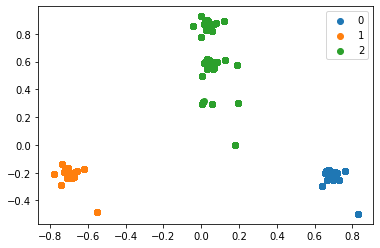

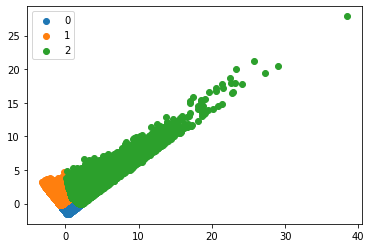

In [34]:
n = 3
articles_labels, one_hot_encoded_articles = get_groups(principal_components_articles, n)
scatter_plot(principal_components_articles,articles_labels)
customers_labels, one_hot_encoded_customers = get_groups(principal_components_customers, n)
scatter_plot(principal_components_customers,customers_labels)

# **NOTES**


Bazı customerların yaşı yanlış olabilir, 90 yaş üstü trendyolu kullanan kişi sayısının olması beni şaşırttı.